In [1]:
import calendar
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-dark')

In [2]:
# Source: Global Monitoring Laboratory, NOAA

# Global Monthly Mean CO2
co2_mm_gl = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_gl.txt"

# Daily Global CO2
co2_trend_gl = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_trend_gl.txt"

In [3]:
# Read the Global Monthly Mean CO2 file
co2_mm_gl_df = pd.read_csv(co2_mm_gl, 
                         sep=r"\s+", 
                         comment='#', 
                         names=["year",
                                "month", 
                                "decimal", 
                                "average", 
                                "trend"])

In [4]:
co2_mm_gl_df.head(5)

,year,month,decimal,average,trend
0,1980,1,1980.042,338.55,337.93
1,1980,2,1980.125,339.27,338.22
2,1980,3,1980.208,339.60,338.25
3,1980,4,1980.292,340.00,338.37
4,1980,5,1980.375,340.43,338.90


In [5]:
co2_mm_gl_df["date_text"] = co2_mm_gl_df.apply(lambda r: "{} {}".format(calendar.month_name[int(r["month"])], 
                       int(r["year"])), axis=1)

In [6]:
# Get the most up-to-date Global Monthly Mean of CO2 reading
last_month = co2_mm_gl_df.iloc[-1]

# ...and compare it with that of the previous year
prev_year = co2_mm_gl_df[co2_mm_gl_df["decimal"] == last_month["decimal"] - 1]

In [7]:
boxtext = ""
boxtext += "{}: {} ppm\n".format(last_month["date_text"], 
                              last_month["average"])
boxtext += "{}: {} ppm".format(prev_year["date_text"].item(), 
                            prev_year["average"].item())

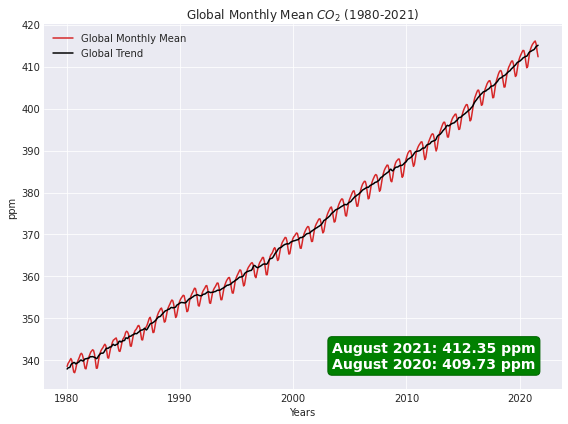

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(co2_mm_gl_df["decimal"], co2_mm_gl_df["average"], c="tab:red")
ax.plot(co2_mm_gl_df["decimal"], co2_mm_gl_df["trend"], c="k")
ax.set_title("Global Monthly Mean $CO_{2}$ (1980-2021)")
ax.set_xlabel("Years")
ax.set_ylabel("ppm")
ax.text(0.95, 0.05, boxtext,
        horizontalalignment='right', 
        color='white',
        fontsize=14,
        fontweight='bold',
        verticalalignment='bottom',
        bbox=dict(facecolor="green", 
                  edgecolor="darkgreen", 
                  boxstyle='round'),
        transform=ax.transAxes)
ax.legend(["Global Monthly Mean", "Global Trend"])
ax.grid()
plt.tight_layout()
plt.show()

In [9]:
# Read the Global daily CO2 file
co2_trend_gl_df = pd.read_csv(co2_trend_gl, 
                        sep=r"\s+", 
                        comment='#', 
                        names=["year", 
                               "month", 
                               "day", 
                               "cycle", 
                               "trend"])

In [10]:
co2_trend_gl_df.head(5)

,year,month,day,cycle,trend
0,2011,1,1,391.25,389.73
1,2011,1,2,391.29,389.73
2,2011,1,3,391.32,389.74
3,2011,1,4,391.36,389.75
4,2011,1,5,391.39,389.75


In [11]:
# Create a Datetime column from year, month, day
co2_trend_gl_df["date"] = pd.to_datetime(co2_trend_gl_df[['year', 
                                              'month', 
                                              'day']])

co2_trend_gl_df["date_str"] = co2_trend_gl_df.apply(lambda r: "{} {}".format(calendar.month_name[int(r["month"])], 
                       int(r["day"])), axis=1)

In [12]:
# Get the last 5 days
last_5days_co2 = co2_trend_gl_df.tail(5)

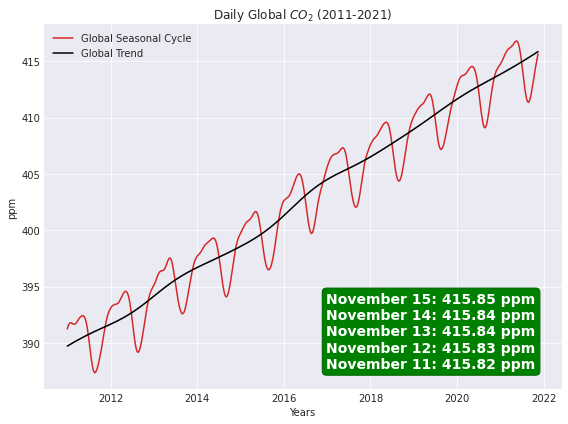

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(co2_trend_gl_df["date"], co2_trend_gl_df["cycle"], c="tab:red")
ax.plot(co2_trend_gl_df["date"], co2_trend_gl_df["trend"], c="k")
ax.set_title("Daily Global $CO_{2}$ (2011-2021)")
ax.set_xlabel("Years")
ax.set_ylabel("ppm")

boxtext = ""
for idx, row in last_5days_co2[::-1].iterrows():
    if idx == last_5days_co2.index[0]:
        boxtext += "{}: {} ppm".format(row["date_str"], row["trend"])
    else:
        boxtext += "{}: {} ppm\n".format(row["date_str"], row["trend"])

ax.text(0.95, 0.05, boxtext,
        horizontalalignment='right', 
        color='white',
        fontsize=14,
        fontweight='bold',
        verticalalignment='bottom',
        bbox=dict(facecolor="green", 
                  edgecolor="darkgreen", 
                  boxstyle='round'),
        transform=ax.transAxes)
ax.legend(["Global Seasonal Cycle", "Global Trend"])
ax.grid()
plt.tight_layout()
plt.show()